In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [3]:
#load  dataset
data = pd.read_csv('Rainfall.csv')

In [4]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1.0,1025.9,19.9,18.3,16.8,13.1,72.0,49.0,yes,9.3,80.0,26.3
1,2.0,1022.0,21.7,18.9,17.2,15.6,81.0,83.0,yes,0.6,50.0,15.3
2,3.0,1019.7,20.3,19.3,18.0,18.4,95.0,91.0,yes,0.0,40.0,14.2
3,4.0,1018.9,22.3,20.6,19.1,18.8,90.0,88.0,yes,1.0,50.0,16.9
4,5.0,1015.9,21.3,20.7,20.2,19.9,95.0,81.0,yes,0.0,40.0,13.7


In [5]:
data.shape

(1469, 12)

In [6]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [7]:
data['day'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., nan])

In [8]:
print("Data Info :")
data.info()

Data Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     1464 non-null   float64
 1   pressure                1464 non-null   float64
 2   maxtemp                 1464 non-null   float64
 3   temparature             1464 non-null   float64
 4   mintemp                 1464 non-null   float64
 5   dewpoint                1464 non-null   float64
 6   humidity                1464 non-null   float64
 7   cloud                   1464 non-null   float64
 8   rainfall                1464 non-null   object 
 9   sunshine                1464 non-null   float64
 10           winddirection  1460 non-null   float64
 11  windspeed               1460 non-null   float64
dtypes: float64(11), object(1)
memory usage: 137.8+ KB


In [9]:
data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [10]:
#remove extra spaces in all columns
data.columns = data.columns.str.strip()

In [11]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            1464 non-null   float64
 1   pressure       1464 non-null   float64
 2   maxtemp        1464 non-null   float64
 3   temparature    1464 non-null   float64
 4   mintemp        1464 non-null   float64
 5   dewpoint       1464 non-null   float64
 6   humidity       1464 non-null   float64
 7   cloud          1464 non-null   float64
 8   rainfall       1464 non-null   object 
 9   sunshine       1464 non-null   float64
 10  winddirection  1460 non-null   float64
 11  windspeed      1460 non-null   float64
dtypes: float64(11), object(1)
memory usage: 137.8+ KB


In [13]:
data = data.drop(columns=['day'])

In [14]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72.0,49.0,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81.0,83.0,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95.0,91.0,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90.0,88.0,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95.0,81.0,yes,0.0,40.0,13.7


In [15]:
data.isnull().sum()

pressure         5
maxtemp          5
temparature      5
mintemp          5
dewpoint         5
humidity         5
cloud            5
rainfall         5
sunshine         5
winddirection    9
windspeed        9
dtype: int64

In [16]:
data['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [17]:
# handle the missing values
data['winddirection'] = data['winddirection'].fillna(data['winddirection'].mode()[0])
data['windspeed'] = data['windspeed'].fillna(data['windspeed'].median())

In [18]:
data.isnull().sum()

pressure         5
maxtemp          5
temparature      5
mintemp          5
dewpoint         5
humidity         5
cloud            5
rainfall         5
sunshine         5
winddirection    0
windspeed        0
dtype: int64

In [19]:
data['winddirection'].mode()

0    20.0
Name: winddirection, dtype: float64

In [20]:
data['rainfall'].unique()

array(['yes', 'no', nan], dtype=object)

In [21]:
# converting yes and no to 1 and 0
data['rainfall'] = data['rainfall'].map({"yes": 1, "no": 0})

In [22]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72.0,49.0,1.0,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81.0,83.0,1.0,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95.0,91.0,1.0,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90.0,88.0,1.0,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95.0,81.0,1.0,0.0,40.0,13.7


In [23]:
# exploratory data analysis (EDA)
data.shape

(1469, 11)

In [24]:
#setting plot style for all plots
sns.set(style="whitegrid")

In [25]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1469.000000,1469.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.007488,21.530633
std,6.408196,5.972210,5.627035,5.588414,5.990869,10.052148,21.775651,0.466509,3.930362,81.637319,10.028797
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.800000,17.100000,16.100000,75.000000,58.000000,0.000000,0.500000,40.000000,13.700000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.600000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.900000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


<Axes: >

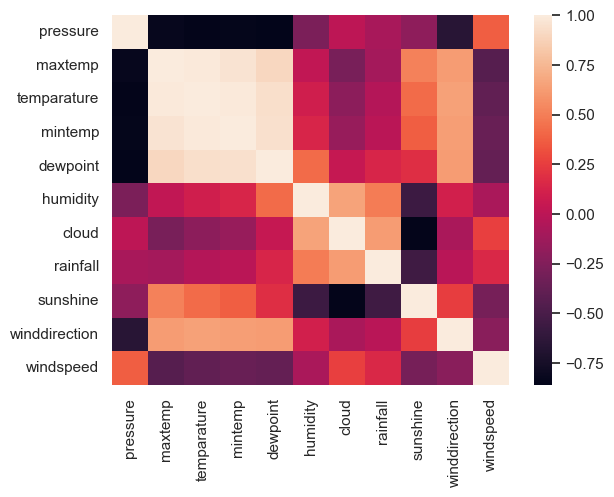

In [26]:
sns.heatmap(data.corr())

In [27]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

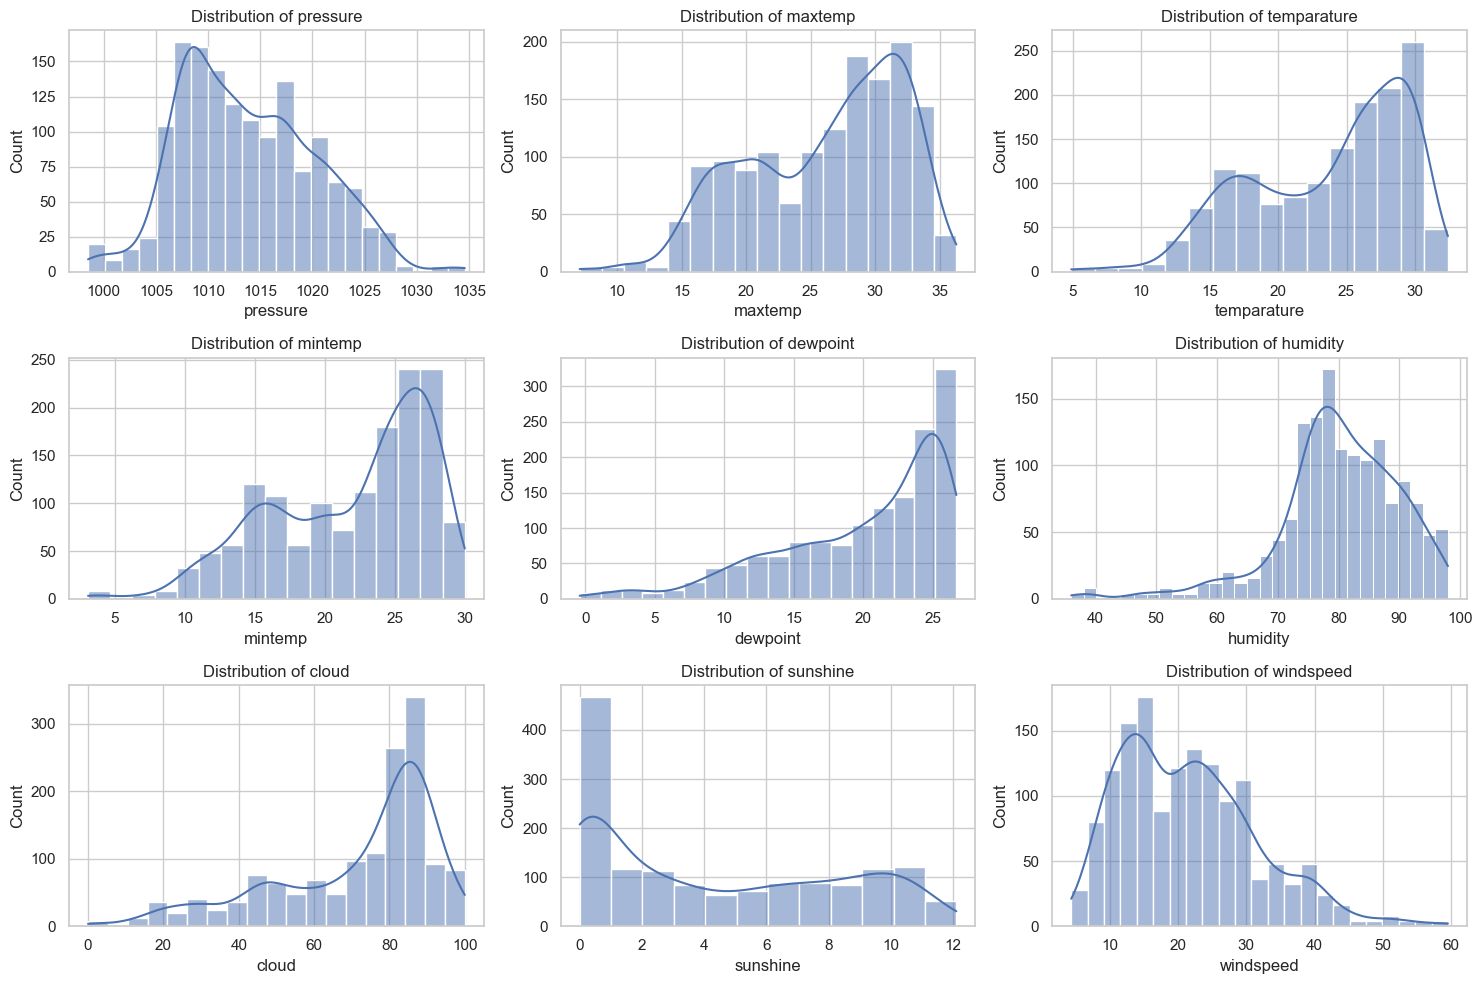

In [28]:
plt.figure(figsize=(15,10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed'], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")


plt.tight_layout()
plt.show()

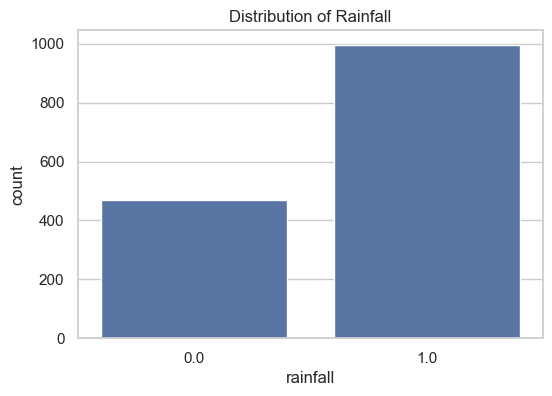

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x="rainfall")
plt.title("Distribution of Rainfall")
plt.show()

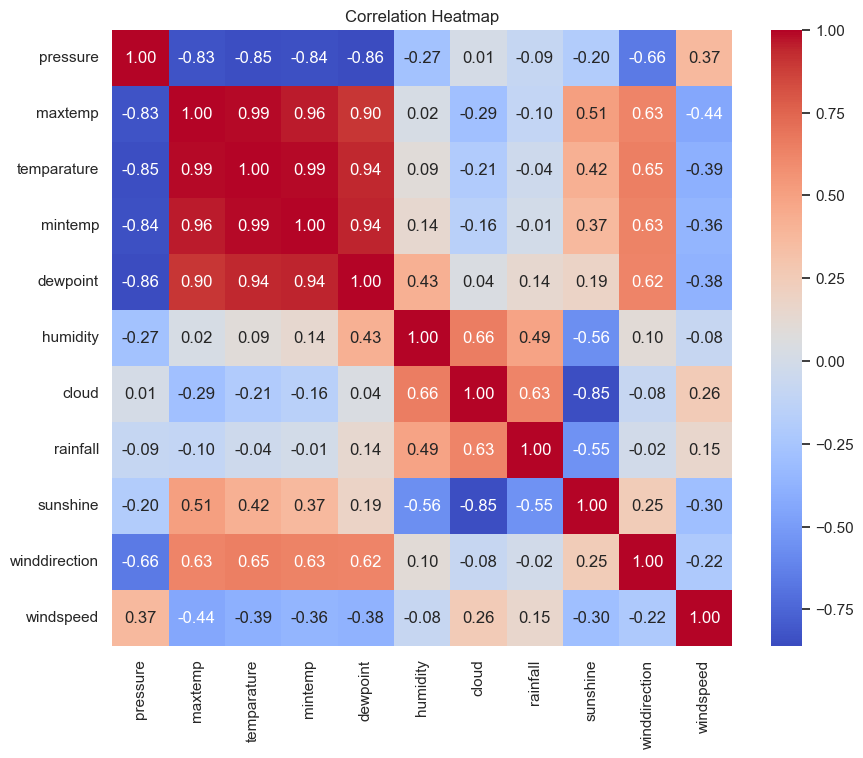

In [30]:
# correlation matric
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

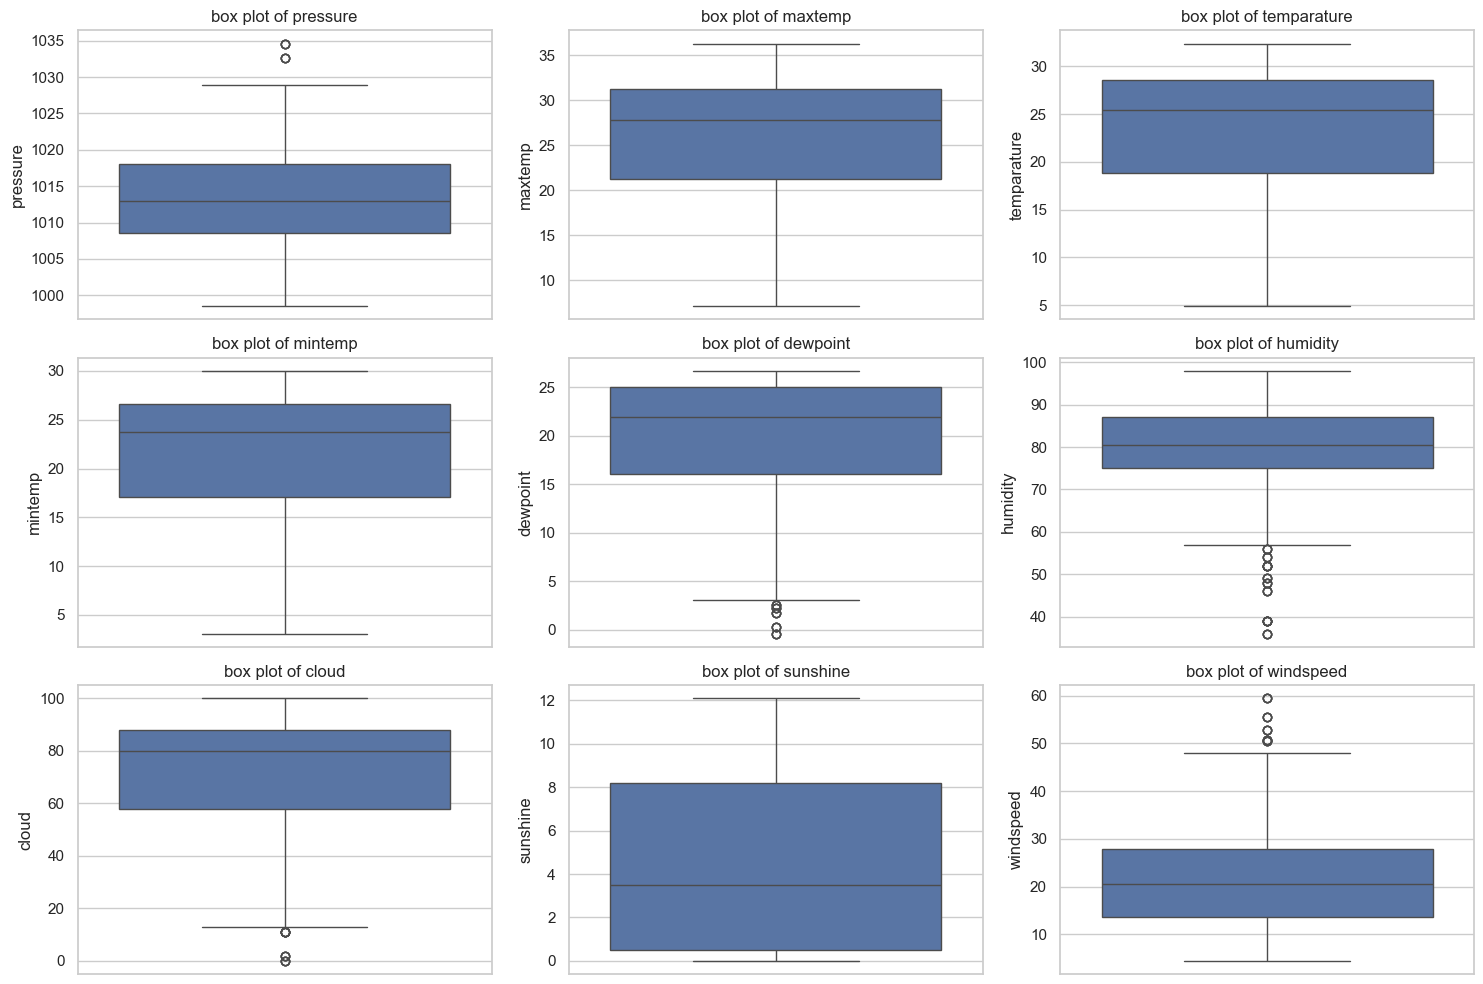

In [31]:
plt.figure(figsize=(15,10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed'], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[column])
    plt.title(f"box plot of {column}")


plt.tight_layout()
plt.show()

In [32]:
#data preprocessing
#drop correlated columns
data= data.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [33]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72.0,49.0,1.0,9.3,80.0,26.3
1,1022.0,15.6,81.0,83.0,1.0,0.6,50.0,15.3
2,1019.7,18.4,95.0,91.0,1.0,0.0,40.0,14.2
3,1018.9,18.8,90.0,88.0,1.0,1.0,50.0,16.9
4,1015.9,19.9,95.0,81.0,1.0,0.0,40.0,13.7


In [34]:
data['rainfall'].value_counts()

rainfall
1.0    996
0.0    468
Name: count, dtype: int64

In [35]:
# seperate majority and minority classes
df_majority = data[data['rainfall'] == 1]
df_minority = data[data['rainfall'] == 0]

In [36]:
df_majority.shape

(996, 8)

In [37]:
df_minority.shape

(468, 8)

In [38]:
# downsample majority class to match minority count

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

In [39]:
df_majority_downsampled.shape

(468, 8)

In [40]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [41]:
df_downsampled.shape

(936, 8)

In [42]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
1222,1013.9,19.6,76.0,68.0,1.0,6.0,90.0,30.5
1426,1017.0,22.9,84.0,58.0,1.0,5.9,70.0,22.1
136,1011.2,19.4,73.0,69.0,1.0,7.2,10.0,21.9
858,1011.4,23.9,86.0,84.0,1.0,3.1,220.0,11.8
661,1010.2,19.3,65.0,64.0,1.0,6.4,10.0,13.2


In [43]:
# shuffle the final df
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [44]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1018.9,18.8,90.0,88.0,1.0,1.0,50.0,16.9
1,1012.0,23.0,74.0,44.0,1.0,10.1,70.0,26.2
2,1015.0,13.6,90.0,100.0,1.0,0.0,60.0,33.2
3,1008.1,25.0,79.0,75.0,0.0,6.7,200.0,12.0
4,1017.0,21.1,80.0,83.0,0.0,0.4,70.0,40.4


In [45]:
df_downsampled['rainfall'].value_counts()

rainfall
1.0    468
0.0    468
Name: count, dtype: int64

In [46]:
#split features and target as x and y
x = df_downsampled.drop(columns=['rainfall'])
y = df_downsampled['rainfall']

In [47]:
x

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1018.9,18.8,90.0,88.0,1.0,50.0,16.9
1,1012.0,23.0,74.0,44.0,10.1,70.0,26.2
2,1015.0,13.6,90.0,100.0,0.0,60.0,33.2
3,1008.1,25.0,79.0,75.0,6.7,200.0,12.0
4,1017.0,21.1,80.0,83.0,0.4,70.0,40.4
...,...,...,...,...,...,...,...
931,1008.4,26.0,93.0,88.0,0.5,130.0,24.8
932,1008.1,26.4,79.0,69.0,8.5,240.0,25.1
933,1007.8,22.7,77.0,63.0,5.6,20.0,11.3
934,1017.0,22.9,84.0,58.0,5.9,70.0,22.1


In [48]:
y

0      1.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
931    1.0
932    1.0
933    0.0
934    1.0
935    1.0
Name: rainfall, Length: 936, dtype: float64

In [49]:
# splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [50]:
rf = RandomForestClassifier(random_state = 42)

param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_features" : ["sqrt", "log2"],
    "max_depth" : [None, 10, 20, 30],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1, 2, 4]

}

In [51]:
# Hypertuning using GridSearchCV
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [52]:
best_rf_model = grid_search_rf.best_estimator_

print("best parameters for random forest : ", grid_search_rf.best_params_)

best parameters for random forest :  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [53]:
cv_scores = cross_val_score(best_rf_model, x_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.97333333 0.96       0.94       0.94630872 0.96644295]
Mean cross-validation score: 0.9572170022371365


In [54]:
# test set performance
y_pred= best_rf_model.predict(x_test)
print("Accuracy score : ", accuracy_score(y_test, y_pred))
print("\n\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\n\nClassification Report : \n", classification_report(y_test, y_pred))

Accuracy score :  0.9627659574468085


Confusion Matrix : 
 [[87  0]
 [ 7 94]]


Classification Report : 
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        87
         1.0       1.00      0.93      0.96       101

    accuracy                           0.96       188
   macro avg       0.96      0.97      0.96       188
weighted avg       0.97      0.96      0.96       188



In [55]:
x_train.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [56]:
#prediction on unknown data
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input_data], columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'])




In [57]:
input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [58]:
prediction = best_rf_model.predict(input_df)
print("Prediction Result :", "Rainfall" if prediction[0]==1 else "No Rainfall")

Prediction Result : Rainfall


In [59]:
# save model and feature name to a pickle file
model_data = {"Model": best_rf_model, "feature name ": x.columns.tolist()}

with open("rainfall_prediction_model.pkl", "wb") as file:
    pickle.dump(model_data, file)

In [60]:
#load same model file and use it for prediction
import pickle
import pandas as pd


In [61]:
#load trained model and feature names from pickle file
with open("rainfall_prediction_model.pkl", "rb") as file:
    model_data = pickle.load(file)

In [62]:
model = model_data["Model"]
feature_name = model_data["feature name "]

In [63]:
print(model_data.keys())

dict_keys(['Model', 'feature name '])


In [64]:
#prediction on unknown data
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input_data], columns=feature_name)




In [65]:
prediction = best_rf_model.predict(input_df)
print("Prediction Result :", "Rainfall" if prediction[0]==1 else "No Rainfall")

Prediction Result : Rainfall


In [66]:
x

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1018.9,18.8,90.0,88.0,1.0,50.0,16.9
1,1012.0,23.0,74.0,44.0,10.1,70.0,26.2
2,1015.0,13.6,90.0,100.0,0.0,60.0,33.2
3,1008.1,25.0,79.0,75.0,6.7,200.0,12.0
4,1017.0,21.1,80.0,83.0,0.4,70.0,40.4
...,...,...,...,...,...,...,...
931,1008.4,26.0,93.0,88.0,0.5,130.0,24.8
932,1008.1,26.4,79.0,69.0,8.5,240.0,25.1
933,1007.8,22.7,77.0,63.0,5.6,20.0,11.3
934,1017.0,22.9,84.0,58.0,5.9,70.0,22.1
